In [ ]:
# feature extractoring and preprocessing data
import librosa
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import os
from PIL import Image
import pathlib
import csv

# Preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler

#Keras
import keras

import warnings
warnings.filterwarnings('ignore')

In [ ]:
!pip install python_speech_features
!pip install scipy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for python-speech-features: filename=python_speech_features-0.6-py3-none-any.whl size=5888 sha256=51b6cd53288f0577ae4d297dbec90d090951cff13cb3aeaed30485faf89f6330
  Stored in directory: /root/.cache/pip/wheels/b0/0e/94/28cd6afa3cd5998a63eef99fe31777acd7d758f59cf24839eb
Successfully built python-speech-features
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import numpy as np
import pandas as pd
import scipy.io.wavfile as wav
from python_speech_features import mfcc
from tempfile import TemporaryFile
import os
import math
import pickle
import random
import operator

In [ ]:
#define a function to get distance between feature vectors and find neighbors
def getNeighbors(trainingset, instance, k):
    distances = []
    for x in range(len(trainingset)):
        dist = distance(trainingset[x], instance, k) + distance(instance,trainingset[x],k)
        distances.append((trainingset[x][2], dist))
    distances.sort(key=operator.itemgetter(1))
    neighbors = []
    for x in range(k):
        neighbors.append(distances[x][0])
    return neighbors

In [ ]:
#function to identify the nearest neighbors
def nearestclass(neighbors):
    classVote = {}
    
    for x in range(len(neighbors)):
        response = neighbors[x]
        if response in classVote:
            classVote[response] += 1
        else:
            classVote[response] = 1
            
    sorter = sorted(classVote.items(), key=operator.itemgetter(1), reverse=True)
    return sorter[0][0]

In [ ]:
def getAccuracy(testSet, prediction):
    correct = 0
    for x in range(len(testSet)):
        if testSet[x][-1] == prediction[x]:
            correct += 1
    return 1.0 * correct / len(testSet)

In [ ]:
import librosa, IPython
import librosa.display
file = '/content/classical.00000.wav'
signal, sr = librosa.load(file , sr = 22050) 
IPython.display.Audio(signal, rate=sr)

In [ ]:
import librosa
audio_path = '/content/classical.00000.wav'
x , sr = librosa.load(audio_path)
print(type(x), type(sr))

<class 'numpy.ndarray'> <class 'int'>


In [ ]:
librosa.load(audio_path, sr=44100)

(array([-0.01989731, -0.02410206, -0.01766241, ...,  0.03488835,
         0.03062992,  0.01551908], dtype=float32), 44100)

In [ ]:
import IPython.display as ipd
ipd.Audio(audio_path)

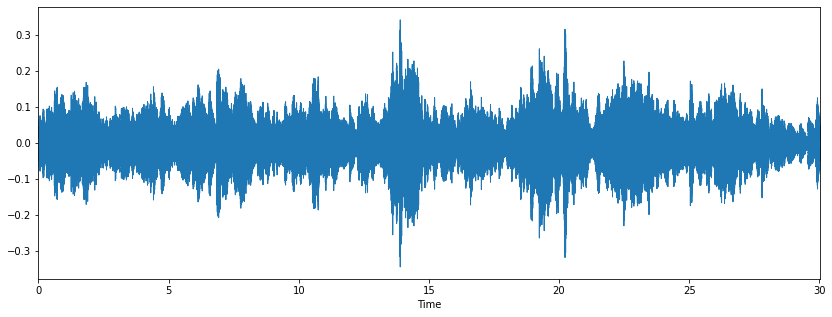

In [ ]:
#display waveform
%matplotlib inline
import matplotlib.pyplot as plt
import librosa.display
plt.figure(figsize=(14, 5))
librosa.display.waveplot(x, sr=sr)

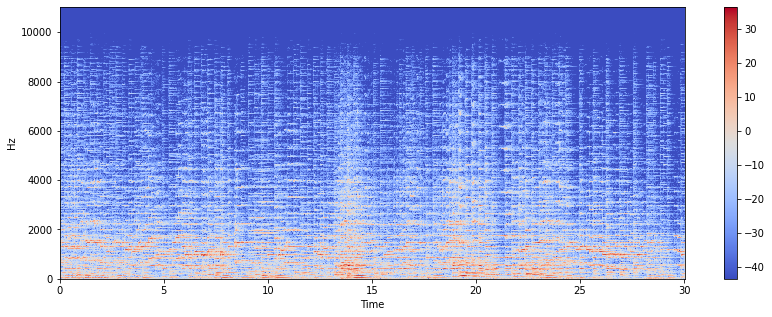

In [ ]:
#display Spectrogram
X = librosa.stft(x)
Xdb = librosa.amplitude_to_db(abs(X))
plt.figure(figsize=(14, 5))
librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz') 
#If to pring log of frequencies  
#librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='log')
plt.colorbar()

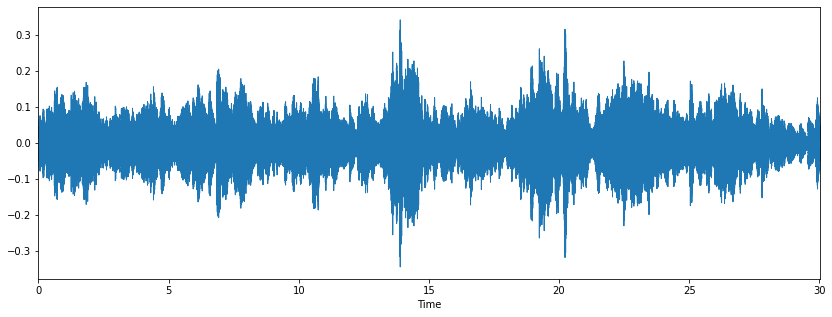

In [ ]:
x, sr = librosa.load(audio_path)
#Plot the signal:
plt.figure(figsize=(14, 5))
librosa.display.waveplot(x, sr=sr)

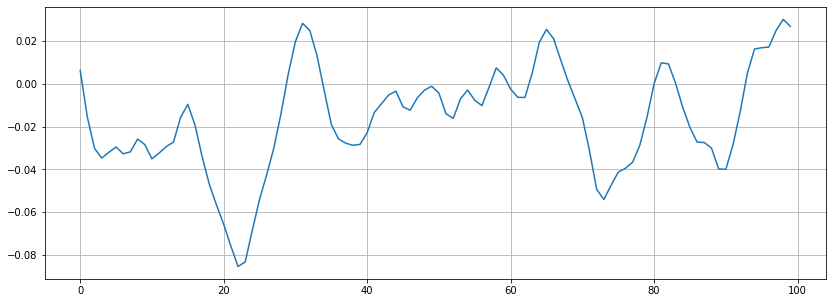

In [ ]:
# Zooming in
n0 = 9000
n1 = 9100
plt.figure(figsize=(14, 5))
plt.plot(x[n0:n1])
plt.grid()

In [ ]:
zero_crossings = librosa.zero_crossings(x[n0:n1], pad=False)
print(sum(zero_crossings))

10


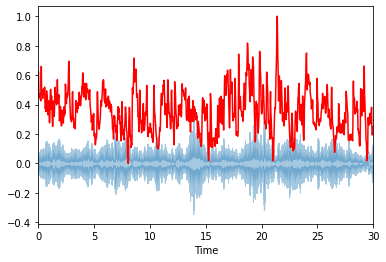

In [ ]:
#spectral centroid -- centre of mass -- weighted mean of the frequencies present in the sound
import sklearn
spectral_centroids = librosa.feature.spectral_centroid(x, sr=sr)[0]
spectral_centroids.shape
# Computing the time variable for visualization
frames = range(len(spectral_centroids))
t = librosa.frames_to_time(frames)
# Normalising the spectral centroid for visualisation
def normalize(x, axis=0):
    return sklearn.preprocessing.minmax_scale(x, axis=axis)
#Plotting the Spectral Centroid along the waveform
librosa.display.waveplot(x, sr=sr, alpha=0.4)
plt.plot(t, normalize(spectral_centroids), color='r')

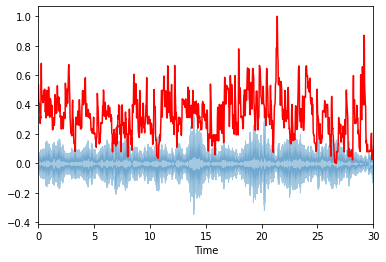

In [ ]:
spectral_rolloff = librosa.feature.spectral_rolloff(x, sr=sr)[0]
librosa.display.waveplot(x, sr=sr, alpha=0.4)
plt.plot(t, normalize(spectral_rolloff), color='r')

(20, 1293)


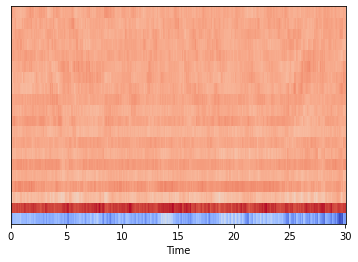

In [ ]:
mfccs = librosa.feature.mfcc(x, sr=sr)
print(mfccs.shape)
#Displaying  the MFCCs:
librosa.display.specshow(mfccs, sr=sr, x_axis='time')

In [ ]:
director = '/content/features_3_sec.csv'
# pd.read_csv(directory)
f = open("mydataset.dat", "wb")
i = 0
for folder in director:
    #print(folder)
    i += 1
    if i == 11:
        break
    for file in director:
        #print(file)
        try:
            (rate, sig) = wav.read(director)
            mfcc_feat = mfcc(sig, rate, winlen = 0.020, appendEnergy=False)
            covariance = np.cov(np.matrix.transpose(mfcc_feat))
            mean_matrix = mfcc_feat.mean(0)
            feature = (mean_matrix, covariance, i)
            pickle.dump(feature, f)
        except Exception as e:
            print("Got an exception: ", e, 'in folder: ', folder, ' filename: ', file)
f.close()

Got an exception:  File format b'file'... not understood. in folder:  /  filename:  /
Got an exception:  File format b'file'... not understood. in folder:  /  filename:  c
Got an exception:  File format b'file'... not understood. in folder:  /  filename:  o
Got an exception:  File format b'file'... not understood. in folder:  /  filename:  n
Got an exception:  File format b'file'... not understood. in folder:  /  filename:  t
Got an exception:  File format b'file'... not understood. in folder:  /  filename:  e
Got an exception:  File format b'file'... not understood. in folder:  /  filename:  n
Got an exception:  File format b'file'... not understood. in folder:  /  filename:  t
Got an exception:  File format b'file'... not understood. in folder:  /  filename:  /
Got an exception:  File format b'file'... not understood. in folder:  /  filename:  f
Got an exception:  File format b'file'... not understood. in folder:  /  filename:  e
Got an exception:  File format b'file'... not understo

In [ ]:
import librosa
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import os
import csv
# Preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
#Keras
import keras
from keras import models
from keras import layers


# generating a dataset
header = 'filename chroma_stft rmse spectral_centroid spectral_bandwidth rolloff zero_crossing_rate'
for i in range(1, 21):
    header += f' mfcc{i}'
header += ' label'
header = header.split()

In [ ]:
file = open('data.csv', 'w', newline='')
with file:
    writer = csv.writer(file)
    writer.writerow(header)
genres = 'blues classical country disco hiphop jazz metal pop reggae rock'.split()
data = pd.read_csv('data.csv')
data.head()

Empty DataFrame
Columns: [filename, chroma_stft, rmse, spectral_centroid, spectral_bandwidth, rolloff, zero_crossing_rate, mfcc1, mfcc2, mfcc3, mfcc4, mfcc5, mfcc6, mfcc7, mfcc8, mfcc9, mfcc10, mfcc11, mfcc12, mfcc13, mfcc14, mfcc15, mfcc16, mfcc17, mfcc18, mfcc19, mfcc20, label]
Index: []

[0 rows x 28 columns]

In [ ]:
for g in genres:
    for filename in os.listdir(f'/'):
        songname = f'./genres/{g}/{filename}'
        y, sr = librosa.load(songname, mono=True, duration=30)
        chroma_stft = librosa.feature.chroma_stft(y=y, sr=sr)
        rmse = librosa.feature.rmse(y=y)
        spec_cent = librosa.feature.spectral_centroid(y=y, sr=sr)
        spec_bw = librosa.feature.spectral_bandwidth(y=y, sr=sr)
        rolloff = librosa.feature.spectral_rolloff(y=y, sr=sr)
        zcr = librosa.feature.zero_crossing_rate(y)
        mfcc = librosa.feature.mfcc(y=y, sr=sr)
        to_append = f'{filename} {np.mean(chroma_stft)} {np.mean(rmse)} {np.mean(spec_cent)} {np.mean(spec_bw)} {np.mean(rolloff)} {np.mean(zcr)}'    
        for e in mfcc:
            to_append += f' {np.mean(e)}'
        to_append += f' {g}'
        file = open('data.csv', 'a', newline='')
        with file:
            writer = csv.writer(file)
            writer.writerow(to_append.split())
            

FileNotFoundError: ignored

In [ ]:
data = pd.read_csv('data.csv')
data.head()

Empty DataFrame
Columns: [filename, chroma_stft, rmse, spectral_centroid, spectral_bandwidth, rolloff, zero_crossing_rate, mfcc1, mfcc2, mfcc3, mfcc4, mfcc5, mfcc6, mfcc7, mfcc8, mfcc9, mfcc10, mfcc11, mfcc12, mfcc13, mfcc14, mfcc15, mfcc16, mfcc17, mfcc18, mfcc19, mfcc20, label]
Index: []

[0 rows x 28 columns]

In [ ]:
# Dropping unneccesary columns
data = data.drop(['filename'],axis=1)
data.head()

length  chroma_stft_mean  chroma_stft_var  rms_mean   rms_var  \
0   66149          0.335406         0.091048  0.130405  0.003521   
1   66149          0.343065         0.086147  0.112699  0.001450   
2   66149          0.346815         0.092243  0.132003  0.004620   
3   66149          0.363639         0.086856  0.132565  0.002448   
4   66149          0.335579         0.088129  0.143289  0.001701   

   spectral_centroid_mean  spectral_centroid_var  spectral_bandwidth_mean  \
0             1773.065032          167541.630869              1972.744388   
1             1816.693777           90525.690866              2010.051501   
2             1788.539719          111407.437613              2084.565132   
3             1655.289045          111952.284517              1960.039988   
4             1630.656199           79667.267654              1948.503884   

   spectral_bandwidth_var  rolloff_mean  ...  mfcc16_var  mfcc17_mean  \
0           117335.771563   3714.560359  ...   39.687145    -3.241280   
1            65671.875673   3869.682242  ...   64.748276    -6.055294   
2            75124.921716   3997.639160  ...   67.336563    -1.768610   
3            82913.639269   3568.300218  ...   47.739452    -3.841155   
4            60204.020268   3469.992864  ...   30.336359     0.664582   

   mfcc17_var  mfcc18_mean  mfcc18_var  mfcc19_mean  mfcc19_var  mfcc20_mean  \
0   36.488243     0.722209   38.099152    -5.050335   33.618073    -0.243027   
1   40.677654     0.159015   51.264091    -2.837699   97.030830     5.784063   
2   28.348579     2.378768   45.717648    -1.938424   53.050835     2.517375   
3   28.337118     1.218588   34.770935    -3.580352   50.836224     3.630866   
4   45.880913     1.689446   51.363583    -3.392489   26.738789     0.536961   

   mfcc20_var  label  
0   43.771767  blues  
1   59.943081  blues  
2   33.105122  blues  
3   32.023678  blues  
4   29.146694  blues  

[5 rows x 59 columns]

In [ ]:
genre_list = data.iloc[:, -1]
encoder = LabelEncoder()
y = encoder.fit_transform(genre_list)
print(y)

[0 0 0 ... 9 9 9]


In [ ]:
scaler = StandardScaler()
X = scaler.fit_transform(np.array(data.iloc[:, :-1], dtype = float))

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [ ]:
from keras import models
from keras import layers
model = models.Sequential()
model.add(layers.Dense(256, activation='relu', input_shape=(X_train.shape[1],)))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

In [ ]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
history = model.fit(X_train,
                    y_train,
                    epochs=20,
                    batch_size=128)

Epoch 1/20
63/63 [==============================] - 1s 4ms/step - loss: 1.3974 - accuracy: 0.5063
Epoch 2/20
63/63 [==============================] - 0s 4ms/step - loss: 0.8387 - accuracy: 0.7170
Epoch 3/20
63/63 [==============================] - 0s 4ms/step - loss: 0.6612 - accuracy: 0.7768
Epoch 4/20
63/63 [==============================] - 0s 4ms/step - loss: 0.5448 - accuracy: 0.8197
Epoch 5/20
63/63 [==============================] - 0s 4ms/step - loss: 0.4559 - accuracy: 0.8531
Epoch 6/20
63/63 [==============================] - 0s 4ms/step - loss: 0.3955 - accuracy: 0.8716
Epoch 7/20
63/63 [==============================] - 0s 4ms/step - loss: 0.3233 - accuracy: 0.9009
Epoch 8/20
63/63 [==============================] - 0s 4ms/step - loss: 0.2784 - accuracy: 0.9140
Epoch 9/20
63/63 [==============================] - 0s 4ms/step - loss: 0.2372 - accuracy: 0.9303
Epoch 10/20
63/63 [==============================] - 0s 4ms/step - loss: 0.2002 - accuracy: 0.9411
Epoch 11/20
63/63 [

In [ ]:
test_loss, test_acc = model.evaluate(X_test,y_test)
print('test_acc: ',test_acc)

63/63 [==============================] - 0s 1ms/step - loss: 0.4113 - accuracy: 0.8829
test_acc:  0.8828828930854797


In [ ]:
predictions = model.predict(X_test)
np.argmax(predictions[956])
predictions[956]

array([5.1733280e-23, 2.3080379e-25, 5.4891461e-25, 5.1380853e-15,
       1.2439305e-07, 1.5940464e-27, 3.7742635e-22, 9.9999988e-01,
       8.1420516e-11, 3.6474194e-18], dtype=float32)